<a href="https://colab.research.google.com/github/samiran097/ANN-Implementation/blob/main/ANN_Implementation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
tf.keras.__version__

'2.6.0'

Keras is a High level API for tensorflow, its a wraper created over tensorflow

In [ ]:
tf.config.list_physical_devices("GPU") # To check if GPU is there or not

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
mnist.load_data

<function keras.datasets.mnist.load_data>

In [ ]:
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data() # This consists of 28X28 black and white data set, with 10 classes

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full[0].shape

(28, 28)

In [ ]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

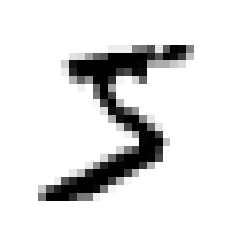

In [ ]:
img = X_train_full[0]

plt.imshow(img,cmap = "binary")
plt.axis("off")
plt.show()

In [ ]:
y_train_full.shape

(60000,)

In [ ]:
y_train_full[0]

5

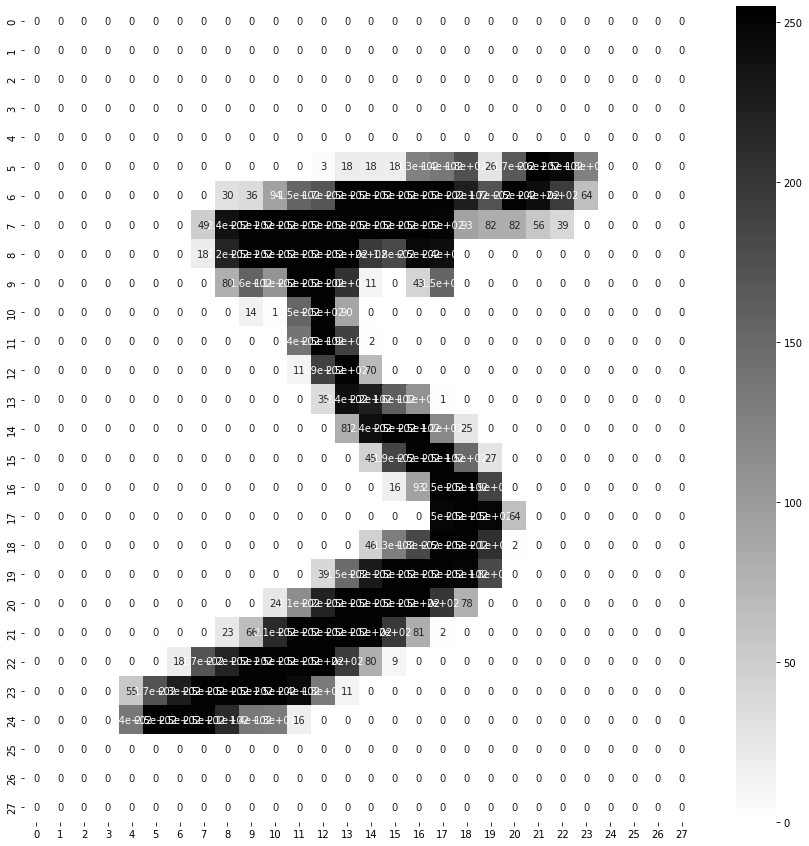

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(img,annot = True,cmap = "binary") # Gives 0 where ever it's white else black

In [ ]:
img.max(),img.min() # maximum & min value of image

(255, 0)

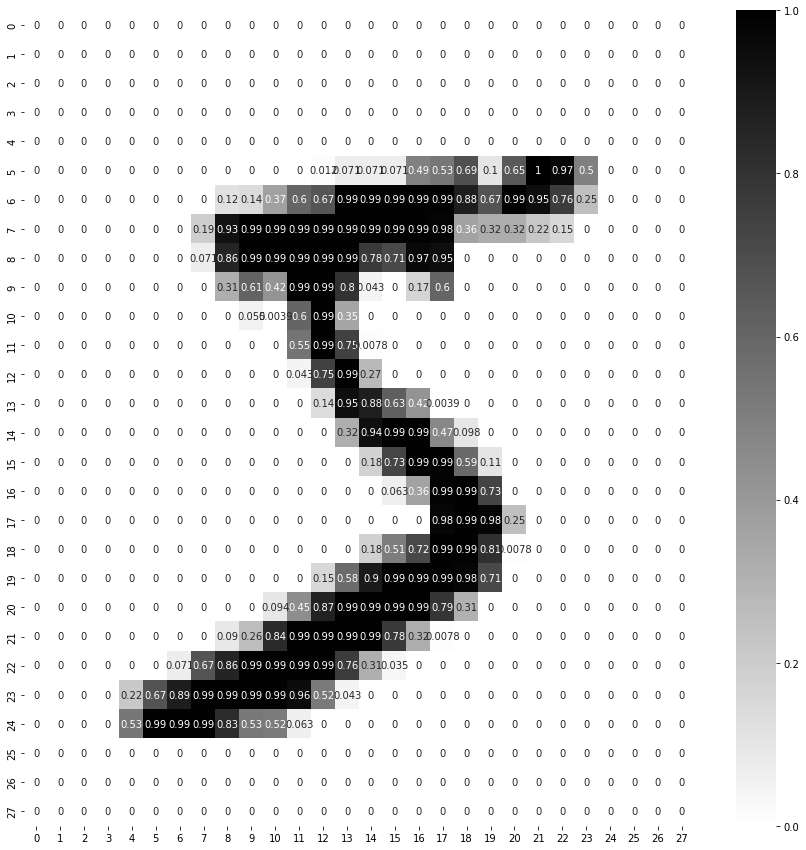

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(img / 255,annot = True,cmap = "binary") # Gives 0 where ever it's white else black

In [ ]:
X_valid,X_train = X_train_full[:5000] / 255.,X_train_full[5000:] / 255. # Creating vaidation (5K records) & training set (55K records)
y_valid,y_train = y_train_full[:5000] / 255.,y_train_full[5000:] / 255.

X_test = X_test / 255.

In [ ]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape = [28,28],name = "inputLayer"), # Converting to 784 neurons ## Flattening data because its not in table format, once flatten it will be in the form of 
          tf.keras.layers.Dense(300 ,activation = "relu",name = "hiddenLayer1"), # Hidden layer
          tf.keras.layers.Dense(100 ,activation = "relu",name = "hiddenLayer2"),
          tf.keras.layers.Dense(10 ,activation = "softmax",name = "outputLayer")
          
]

In [ ]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [ ]:
model_clf.layers

In [ ]:
model_clf.summary()
# Trainable params means the paramenetrs that will change all the time durin training, Refer scribble notes for exact parameter #
# Non-trainable params means if you use any transfer learning model (using pre trained model weights) - This approach uses less GPU and less resources

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# firstlayer * secondlayer + bias
784*300 + 300, 300*100 + 300, 100*10 + 10

(235500, 30300, 1010)

In [ ]:
np.sum((235500, 30300, 1010))

266810

In [ ]:
model_clf.layers[1].name # get the name of any layer

'hiddenLayer1'

In [ ]:
weights,biases = model_clf.layers[1].get_weights()

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"  # used for classification model
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss = LOSS_FUNCTION,optimizer = OPTIMIZER,metrics = METRICS)

In [ ]:
# BY DEFAULT IF BATCH SIZE IS NOT MENTIONED, IT WILL BE 32

# 55000 (TRAIN SET)/ 32 = 1719

In [ ]:
EPOCHS = 30
VALIDATION = (X_valid,y_valid)
history = model_clf.fit(X_train,y_train,epochs = EPOCHS,validation_data = VALIDATION) # ONE CAN SPECIFY THE BATCH SIZE

Epoch 1/30
1719/1719 [==============================] - 8s 3ms/step - loss: 0.0145 - accuracy: 0.0989 - val_loss: 6.1495e-04 - val_accuracy: 0.0958
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 4.4291e-04 - accuracy: 0.0990 - val_loss: 2.8386e-04 - val_accuracy: 0.0958
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.4635e-04 - accuracy: 0.0990 - val_loss: 1.8106e-04 - val_accuracy: 0.0958
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.6975e-04 - accuracy: 0.0990 - val_loss: 1.3173e-04 - val_accuracy: 0.0958
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.2901e-04 - accuracy: 0.0990 - val_loss: 1.0296e-04 - val_accuracy: 0.0958
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0377e-04 - accuracy: 0.0990 - val_loss: 8.4185e-05 - val_accuracy: 0.0958
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 8.6628e-05 - acc

In [ ]:
history.params # verbose means how much value you want to get printed on screen

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.014474,0.098855,0.000615,0.0958
1,0.000443,0.098982,0.000284,0.0958
2,0.000246,0.098982,0.000181,0.0958
3,0.000170,0.098982,0.000132,0.0958
4,0.000129,0.098982,0.000103,0.0958
5,0.000104,0.098982,0.000084,0.0958
6,0.000087,0.098982,0.000071,0.0958
7,0.000074,0.098982,0.000061,0.0958
8,0.000065,0.098982,0.000054,0.0958
9,0.000058,0.098982,0.000048,0.0958


In [ ]:
pd.DataFrame(history.history.plot(figsize=(10,7)))
plt.grid(True)
plt.show()

AttributeError: ignored

In [ ]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.4062 - accuracy: 0.0980


[2.406184673309326, 0.09799999743700027]

In [ ]:
10000/32

312.5

In [ ]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)
y_prob.round(2)

array([[0.28, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08],
       [0.28, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08],
       [0.28, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08]],
      dtype=float32)

In [ ]:
y_prob.shape

(3, 10)

In [ ]:
Y_pred = np.argmax(y_prob,axis = -1) # argmax gives the index of max item in that array , axis = -1 returns the argmax output for all the array
Y_pred

array([0, 0, 0])

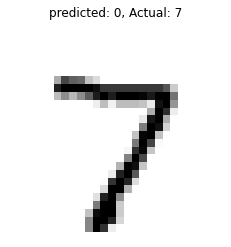

------------------------------------------------------------


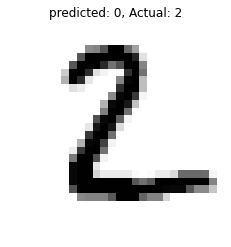

------------------------------------------------------------


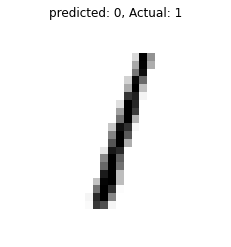

------------------------------------------------------------


In [ ]:
for img_array, pred, actual in zip(X_new,Y_pred,y_test[:3]):
  plt.imshow(img_array,cmap="binary")
  plt.title(f"predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("---"*20)

In [ ]:
a = (1,2,3)

b = (5,6,7)

a+b

(1, 2, 3, 5, 6, 7)

In [ ]:
for i,j in zip(a,b): # array a & b should be same length
  print(i+j)

6
8
10


In [ ]:
model_clf.save("model.h5") # To save the model